# The homography (or planar perspective) transformation


The mathemathical notation in these notes follow Prince's book (Computer Vision Models). 

The (planar) homography transformation is a plane-to-plane mapping that models the imaging geometry of the perspective camera when the camera captures the image of a planar object (e.g., wall, table top, book cover). The homography mapping is depicted in Figure 1.   

<img src="3dplanes.jpg" alt="geometry01" style="zoom:30%;" />

**Figure 1**: The geometry of the homography transformation. The camera center is located at point $C$. The homography transformation $\Phi$ maps a plane in the scene to the image plane. This transformation is a one-to-one mapping between the points on the planes. However, the homography does not model the transformation of 3-D points that do not lie on  on the planar surface. 

## Deriving the homography transformation from the pinhole camera model

The equation of the homography transformation can be derived directly from the pinhole camera model by setting the w-coordinates of the scene object (i.e., a plane) to zero, and then re-arranging the resulting projection matrix. 

Consider the geometry shown in Figure 1. A point ${\bf w} = (u,v,w)^\mathsf{T}$ on the planar object maps to an image point ${\bf x} = (x,y)^\mathsf{T}$ on the image plane of the pinhole camera according to the following model:

$$
\begin{align}
{\bf x} = \text{pinhole}\left[{\bf w}, \Lambda,\Omega,\boldsymbol{\tau}\right]. 
\label{eq_pinhole}
\end{align}
$$

Here, $\Lambda$ is the set of intrinsic parameters, $\Omega$ is the camera rotation, and $\boldsymbol{\tau}$ is the 3-D location of the camera center (i.e., translation). 
For each world point ${\bf w}\in \mathbb{R}^3$, the pinhole-camera model generates an image point ${\bf x}\in \mathbb{R}^2$. 

In matrix form (in homogeneous coordinates), the explicit form of the pinhole-camera model in Equation $\ref{eq_pinhole}$ is:

$$
\begin{align}    
    \lambda
    \begin{bmatrix}
        x \\
        y \\
        1
    \end{bmatrix}
    =  
    \underbrace{\begin{bmatrix}
        {\phi_x} & {\gamma} & {\delta_x} & 0 \\
         0     & {\phi_y} & {\delta_y} & 0 \\
         0     & 0      & 1        & 0 
    \end{bmatrix}}_{\text{intrinsic matrix}}
    \underbrace{\begin{bmatrix}
        {\omega_{11}} & {\omega_{12}} & {\omega_{13}} & {\tau_x} \\
        {\omega_{21}} & {\omega_{22}} & {\omega_{23}} & {\tau_y} \\
        {\omega_{31}} & {\omega_{32}} & {\omega_{33}} & {\tau_z} \\
         0          & 0           & 0           & 1 
    \end{bmatrix}}_{\text{extrinsic matrix}}
    \begin{bmatrix}
        u \\
        v \\
        w \\
        1
    \end{bmatrix}, 
    \label{pinhole_matrix}
\end{align}
$$
or in short:
$$
\begin{align}
    \lambda \tilde{{\bf x}} = 
    \Lambda
    \begin{bmatrix}
        \Omega & {\boldsymbol{\tau}}
    \end{bmatrix} \tilde{{\bf w}}. 
\end{align}
$$

The case we are considering is that of a camera capturing the image of a planar object. Since 3-D points lying on the plane have no depth, we set their third coordinate to zero, i.e., ${w = 0}$: 
$$
\begin{align}    
    \lambda
    \begin{bmatrix}
        x \\
        y \\
        1
    \end{bmatrix}
    =  
    {\begin{bmatrix}
        {\phi_x} & {\gamma} & {\delta_x} & 0 \\
         0     & {\phi_y} & {\delta_y} & 0 \\
         0     & 0      & 1        & 0 
    \end{bmatrix}}
    {\begin{bmatrix}
        {\omega_{11}} & {\omega_{12}} & {\omega_{13}} & {\tau_x} \\
        {\omega_{21}} & {\omega_{22}} & {\omega_{23}} & {\tau_y} \\
        {\omega_{31}} & {\omega_{32}} & {\omega_{33}} & {\tau_z} \\
         0          & 0           & 0           & 1 
    \end{bmatrix}}
    \begin{bmatrix}
        u \\
        v \\
        0 \\
        1
    \end{bmatrix}, 
    \label{pinhole_matrix_zero_w}
\end{align}
$$

which will cancel the third column of the rotation matrix, i.e.:

$$
\begin{align}    
    \lambda
    \begin{bmatrix}
        x \\
        y \\
        1
    \end{bmatrix}
    =  
    {\begin{bmatrix}
        {\phi_x} & {\gamma} & {\delta_x} & 0 \\
         0     & {\phi_y} & {\delta_y} & 0 \\
         0     & 0      & 1        & 0 
    \end{bmatrix}}
    {\begin{bmatrix}
        {\omega_{11}} & {\omega_{12}} & 0 & {\tau_x} \\
        {\omega_{21}} & {\omega_{22}} & 0 & {\tau_y} \\
        {\omega_{31}} & {\omega_{32}} & 0 & {\tau_z} \\
         0            & 0             & 0 & 1 
    \end{bmatrix}}
    \begin{bmatrix}
        u \\
        v \\
        0 \\
        1
    \end{bmatrix}. 
    \label{pinhole_matrix_zero_column}
\end{align}
$$

The resulting transformation simplifies to: 

$$
\begin{align}    
    \lambda
    \begin{bmatrix}
        x \\
        y \\
        1
    \end{bmatrix}
    =  
    \underbrace{\begin{bmatrix}
        {\phi_x} & {\gamma} & {\delta_x} \\
         0     & {\phi_y} & {\delta_y}  \\
         0     & 0      & 1        
    \end{bmatrix}
    \begin{bmatrix}
        {\omega_{11}} & {\omega_{12}}  & {\tau_x} \\
        {\omega_{21}} & {\omega_{22}}  & {\tau_y} \\
        {\omega_{31}} & {\omega_{32}}  & {\tau_z} 
    \end{bmatrix}}_{\text{Homography matrix} \,\,\Phi}
    \begin{bmatrix}
        u \\
        v \\
        1
    \end{bmatrix}. 
    \label{pinhole_matrix_2}
\end{align}
$$

The homography matrix combines the intrinsic parameters and the extrinsic parameters. The extrinsic parameters exclude the third column of the rotation matrix, which makes sense since the scene object is planar and has no depth. 

$$
\begin{align} 
   \begin{bmatrix}
       x \\
       y \\
       1 
   \end{bmatrix}
   =  
   \begin{bmatrix}
       \phi_{11} & \phi_{12} & \phi_{13} \\
       \phi_{21} & \phi_{22} & \phi_{23} \\
       \phi_{31} & \phi_{32} & \phi_{33} \\
   \end{bmatrix}
   \begin{bmatrix}
       u \\
       v \\
       1 
   \end{bmatrix},
   \label{projectivefromobject2image}
 \end{align}
$$

or in short: 

$$
\begin{align} 
   {\bf \tilde{x}} =  \Phi {\bf \tilde{w}}.
 \end{align}
$$



## Example: Mapping points using the homography transformation

In [1]:
import numpy as np
import cv2 as cv
from  matplotlib import pyplot as plt
from scipy.optimize import fsolve, root

%matplotlib inline

### From model points to image points (forward transformation)

Let us assume that we have the following homography matrix:

In [2]:
# An example homography matrix. I scale down the Phi matrix by 1/5. 
Phi =  (1/5) * np.float32(
 [[ 1.43, -0.16,  -96.81],
 [  0.18,  1.76, -211.41],
 [ -0.00,  0.00,    1.00]]
)

print("Phi = ")
print(Phi)

Phi = 
[[ 2.8599998e-01 -3.2000002e-02 -1.9362000e+01]
 [ 3.6000002e-02  3.5200000e-01 -4.2282001e+01]
 [-0.0000000e+00  0.0000000e+00  2.0000000e-01]]


We will use the above homography matrix to map the vertices of a square. Here, we will call these vertices *model features* or *model corners*. The coordinates of the vertices of the square are given by: 

In [3]:
# Model corners (features detected on the model)
modelCorners = np.float32([[0,0],[10,0],[10,10],[0,10]])
modelCorners = modelCorners.T;

print("Model points =")
print(modelCorners)

Model points =
[[ 0. 10. 10.  0.]
 [ 0.  0. 10. 10.]]


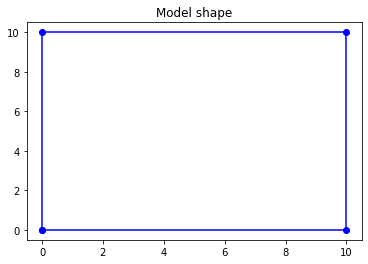

In [4]:
# Add coordinates of the first vertex so plot closes polygon when drawing
u = np.append(modelCorners[0,:], modelCorners[0,0])
v = np.append(modelCorners[1,:], modelCorners[1,0])

plt.plot(u,v,'o-b')
plt.title("Model shape")
plt.show()

Now, we use the homography matrix to transform the vertices of the model shape, i.e., ${\bf \tilde{x}} =  \Phi {\bf \tilde{w}}$. All vertices must be converted to homogeneous coordinates prior to appying the transformation.  

In [5]:
def cartesian2homogeneous(cartCoords: np.array):
    """
    Convert from Cartesian to Homogenous (Arrays of 2-D points only, for now)

    Parameters
    ----------
    cartCoords: np.array
        2xN array containing the coordinates to be converted

    Returns
    -------
    homogenousCoords: np.array
        3xN vector in homogeneous coordinates.

    """
    homogenousCoords = np.vstack ((cartCoords, np.ones(cartCoords.shape[1])) )

    return homogenousCoords

In [6]:
def homogeneous2cartesian(homogeneousCoords: np.array):
    """
    Convert from Cartesian to Homogenous (Arrays of 2-D points only, for now)

    Parameters
    ----------
    homogeneousCoords: np.array
        3xN array containing the homogeneous coordinates to be converted

    Returns
    ------- 
    cartCoords: np.array
        2xN vector in Cartesian coordinates.

    """
    cartCoords = homogeneousCoords[0:2,:]

    return cartCoords

In [7]:
# Convert vertices to homogenous coordinates 
w_tilde = cartesian2homogeneous(modelCorners)

# Apply transformation 
x_tilde = np.dot(Phi, w_tilde)
x_tilde = Phi @ w_tilde


print("x_tilde =")
print(x_tilde)

# Convert points to Cartesian coordinates prior to plotting
imageVertices = homogeneous2cartesian(x_tilde)

x_tilde =
[[-19.36199951 -16.50199968 -16.82199969 -19.68199953]
 [-42.2820015  -41.92200147 -38.40200149 -38.76200151]
 [  0.2          0.2          0.2          0.2       ]]


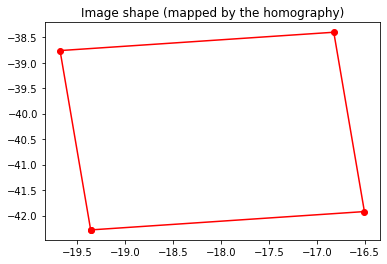

In [8]:
# Append the first vertex so plot() closes the polygon
x = np.append(imageVertices[0,:], imageVertices[0,0])
y = np.append(imageVertices[1,:], imageVertices[1,0])

plt.plot(x,y,'o-r')
plt.title("Image shape (mapped by the homography)")
plt.show()

### From image points to model points (inverse transformation)

Since the homography transformation describes a one-to-one mapping between model points and image points, we can use the homography inverse to map points from the image to the model, i.e., ${\bf \tilde{w}} =  \Phi^{-1} {\bf \tilde{x}}$. 

To show how this works, let's transform the image shape back to its original (model) shape: 

In [9]:
# Obtain the coordinates of the model shape using the inverse homography 
w_tilde_prime = np.linalg.inv(Phi) @ x_tilde

print("w_tilde_prime = \n", w_tilde_prime)

w_tilde_prime = 
 [[1.08440270e-06 1.00000008e+01 1.00000008e+01 1.09262297e-06]
 [7.31540058e-06 7.29877100e-06 1.00000071e+01 1.00000072e+01]
 [1.00000001e+00 1.00000001e+00 1.00000001e+00 1.00000001e+00]]


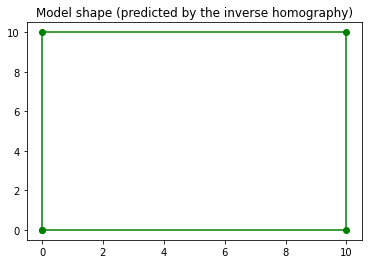

In [10]:
# Convert points to Cartesian coordinates prior to plotting
predictedModelVertices = homogeneous2cartesian(w_tilde_prime)

# Append the first vertex so plot() closes the polygon
u = np.append(predictedModelVertices[0,:], predictedModelVertices[0,0])
v = np.append(predictedModelVertices[1,:], predictedModelVertices[1,0])

plt.plot(u,v,'o-g')
plt.title("Model shape (predicted by the inverse homography)")
plt.show()